## Strategies for high performance
(see more about clustering plant types into different strategies in analys_strategies_cluster.ipynb)

In [25]:
from ideotype.figures import (plot_pca_strategies,
                              plot_strategies,
                              plot_strategies_shift,
                              plot_yield_stability_scatter_strategies,
                              plot_scatter_mechanisms)

### Visualize present-day top-performing strategies

In [2]:
# parameters
n_pheno = 20
w_yield = 1
w_disp = 1
future_run = 'f2100'
rank_limit = 5
target = 'top20'
target_select = 0
target_threshold = 0.5

Equal importance in yield & yield stability:

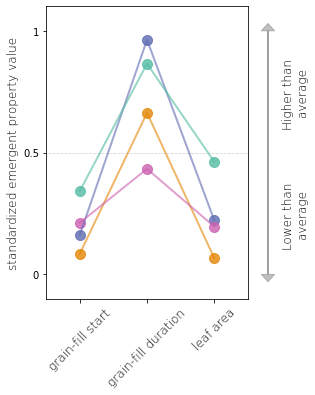

In [3]:
plot_strategies(20, 1, 1, future_run, rank_limit,
                target, target_select, target_threshold)
#                save=True, save_text='present_top20_y1d1')

Yield emphasis (yield 0.7, yield stability 0.3):

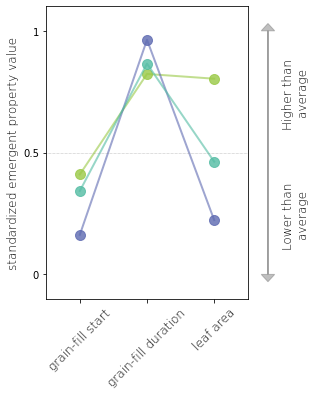

In [4]:
plot_strategies(20, 0.7, 0.3, future_run, rank_limit,
                target, target_select, target_threshold)
#                save=True, save_text='present_top20_y7d3')

Yield stability emphasis (yield 0.3, yield stability 0.7):

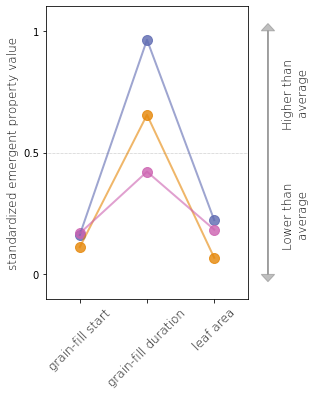

In [5]:
plot_strategies(20, 0.3, 0.7, future_run, rank_limit,
                target, target_select, target_threshold)
#                save=True, save_text='present_top20_y3d7')

### Visualize shift in top-performing strategies by 2100
- Solid lines: strategies with improved performance ranking
- Dashed lines: strategies with similar performance ranking
- Faded dotted lines: strategies with declined performance ranking

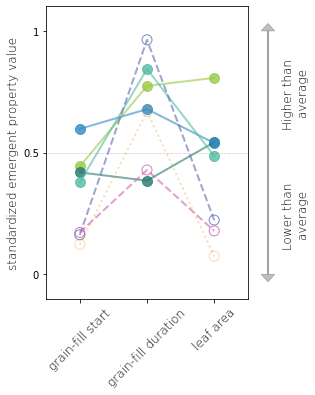

In [6]:
plot_strategies_shift(20, 1, 1, 'f2100', 5, 0.5, 8)
#                      save=True, save_text='y1d1')

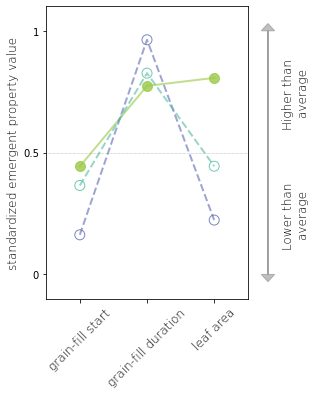

In [7]:
plot_strategies_shift(20, 0.7, 0.3, 'f2100', 5, 0.5, 8)
#                      save=True, save_text='y7d3')

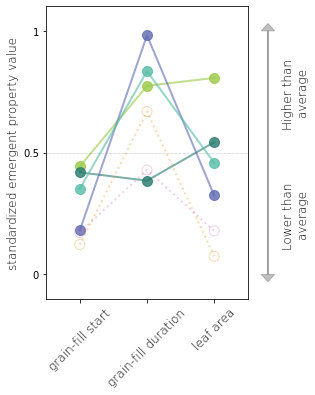

In [8]:
plot_strategies_shift(20, 0.3, 0.7, 'f2100', 5, 0.5, 8)
#                      save=True, save_text='y3d7')

### Visualize strategies in yield & stability space

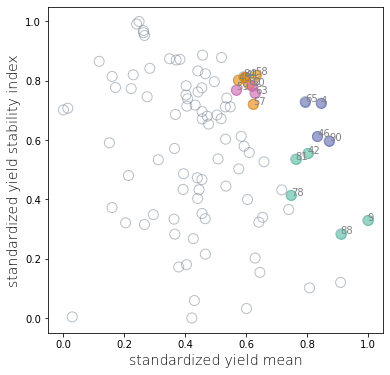

In [9]:
plot_yield_stability_scatter_strategies('top20')

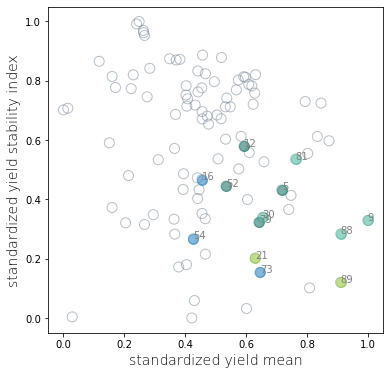

In [10]:
plot_yield_stability_scatter_strategies('improved')

### Visualize strategies & mechanisms

Mechanisms for top strategies under present-day climate during vegetative period:

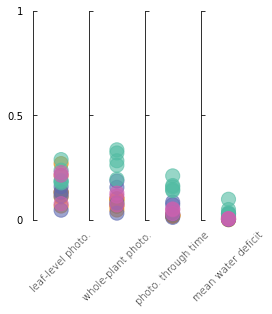

In [11]:
plot_scatter_mechanisms('present', '"Emerged"')

Mechanisms for top strategies under present-day climate during reproductive period:

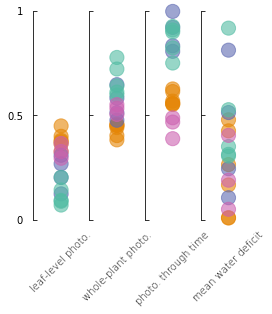

In [12]:
plot_scatter_mechanisms('present', '"grainFill"')

** vvv still in development vvv **

### Visualize strategies & phenology

In [26]:
import os
import itertools
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler
from palettable.cartocolors.qualitative import Vivid_8
from palettable.cartocolors.diverging import Geyser_7


from ideotype import DATA_PATH
from ideotype.data_process import (read_data, 
                                   agg_sims, 
                                   
                                   parse_mature,
                                   fetch_sim_values,
                                   fetch_emps,
                                   process_clusters)
from ideotype.analysis import (rank_top_phenos, 
                               identify_top_phenos,
                               identify_improved_phenos, 
                               identify_rankchanged_phenos,
                               phenostage_climate,
                               run_pca)


In [27]:
# identify phenos
phenos_all = np.arange(100)

# present
run_name = 'present'
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [
    int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
gf_start_present = fetch_sim_values(df_phenology, '"grainFill"', 'jday', phenos_all)

# f2100
run_name = 'f2100'
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [
    int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
gf_start_f2100 = fetch_sim_values(df_phenology, '"grainFill"', 'jday', phenos_all)

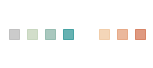

In [18]:
fig = plt.figure(figsize=(2.5,1))
ax = fig.add_subplot(1,1,1)

colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

ax.scatter([1,2,3,4,6,7,8], [1,1,1,1,1,1,1],
            c=colors, marker='s', s=100, alpha=0.6)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/cpalette_phenostages.png', format='png', dpi=800)

### vvv Not sure why the timings are different vvv

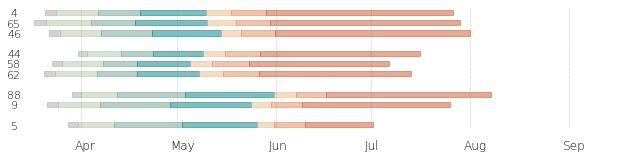

In [24]:
# identify targeted phenos
phenos = [4,65,46,44,58,62,88,9,5]
df_phenology_grouped = df_phenology.groupby(['cvar', 'pheno']).mean()
df_phenos = df_phenology_grouped.query(f'cvar in {phenos}')  

# set up phenostages
phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

# visualization
fig = plt.figure(figsize=(10,2.5))

ax = fig.add_subplot(1,1,1)
ax.plot([85,270],[0,10], alpha=0)
ax.set_xlim(85,260)
ax.set_ylim(0.8,12.8)

jday_months = [91, 121, 152, 182, 213, 244, 274, 305, 335, 350]
for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')

for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenos[
        df_phenos.index.get_level_values('pheno') == f'{phenostage[0]}'].reset_index()
    df_phenostage1.index = df_phenostage1.cvar
    df_phenostage1 = df_phenostage1.reindex(phenos)

    df_phenostage2 = df_phenos[
        df_phenos.index.get_level_values('pheno') == f'{phenostage[1]}'].reset_index()
    df_phenostage2.index = df_phenostage2.cvar
    df_phenostage2 = df_phenostage2.reindex(phenos)

    cvars1 = np.arange(len(phenos))
    cvars2 = np.arange(len(phenos))

    jdays_start = np.empty(len(phenos))
    jdays_start[:] = np.nan
    jdays_start[cvars1] = list(df_phenostage1.jday.values)

    jdays_end = np.empty(len(phenos))
    jdays_end[:] = np.nan
    jdays_end[cvars2] = list(df_phenostage2.jday.values)

    jdays_len = [jend - jstart for jend, jstart in zip(jdays_end, jdays_start)]
    rankings = list(np.arange(len(phenos)))
    rankings.reverse()
    
    poss = [12,11,10,8,7,6,4,3,1]
    for item in np.arange(len(phenos)):
        rect = patches.Rectangle((jdays_start[item], poss[item]), 
                                 jdays_len[item], 0.5,
                                 color=color, alpha=0.5, clip_on=False)
        ax.add_patch(rect)

# invisible spines & axes
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', direction='in', pad=10)

# annotate x & y axis info
xs = [91, 121, 152, 182, 213, 244]
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
for item in np.arange(len(months)):
    ax.text(xs[item]-2, -1.2, months[item], 
            fontweight='light', fontsize=12, clip_on=False)

for pos, pheno in zip(poss, phenos):
    ax.text(70, pos-0.2, pheno, 
            fontweight='light', fontsize=11, clip_on=False, ha='center')

fig.subplots_adjust(bottom=0.2)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_strategies.png', format='png', dpi=800)

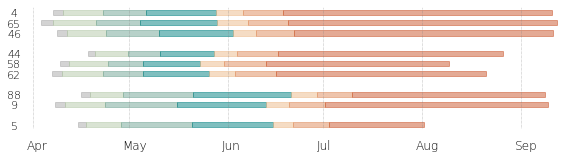

In [806]:
# identify targeted phenos
phenos = [4,65,46,44,58,62,88,9,5]
df_phenology_grouped = df_phenology.groupby(['cvar', 'pheno']).mean()
df_phenos = df_phenology_grouped.query(f'cvar in {phenos}')  

# set up phenostages
phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

# visualization
fig = plt.figure(figsize=(10,2.5))

ax = fig.add_subplot(1,1,1)
ax.plot([85,270],[0,10], alpha=0)
ax.set_xlim(85,260)
ax.set_ylim(0.8,12.8)

jday_months = [91, 121, 152, 182, 213, 244, 274, 305, 335, 350]
for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')

for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenos[
        df_phenos.index.get_level_values('pheno') == f'{phenostage[0]}'].reset_index()
    df_phenostage1.index = df_phenostage1.cvar
    df_phenostage1 = df_phenostage1.reindex(phenos)

    df_phenostage2 = df_phenos[
        df_phenos.index.get_level_values('pheno') == f'{phenostage[1]}'].reset_index()
    df_phenostage2.index = df_phenostage2.cvar
    df_phenostage2 = df_phenostage2.reindex(phenos)

    cvars1 = np.arange(len(phenos))
    cvars2 = np.arange(len(phenos))

    jdays_start = np.empty(len(phenos))
    jdays_start[:] = np.nan
    jdays_start[cvars1] = list(df_phenostage1.jday.values)

    jdays_end = np.empty(len(phenos))
    jdays_end[:] = np.nan
    jdays_end[cvars2] = list(df_phenostage2.jday.values)

    jdays_len = [jend - jstart for jend, jstart in zip(jdays_end, jdays_start)]
    rankings = list(np.arange(len(phenos)))
    rankings.reverse()
    
    poss = [12,11,10,8,7,6,4,3,1]
    for item in np.arange(len(phenos)):
        rect = patches.Rectangle((jdays_start[item], poss[item]), 
                                 jdays_len[item], 0.5,
                                 color=color, alpha=0.5, clip_on=False)
        ax.add_patch(rect)

# invisible spines & axes
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', direction='in', pad=10)

# annotate x & y axis info
xs = [91, 121, 152, 182, 213, 244]
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
for item in np.arange(len(months)):
    ax.text(xs[item]-2, -1.2, months[item], 
            fontweight='light', fontsize=12, clip_on=False)

for pos, pheno in zip(poss, phenos):
    ax.text(85, pos-0.2, pheno, 
            fontweight='light', fontsize=11, clip_on=False, ha='center')

fig.subplots_adjust(bottom=0.2)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_strategies.png', format='png', dpi=800)